In [1]:
#!pip install transformers --upgrade --no-deps
#!pip install protein-bert --no-deps
#!pip install tensorflow_addons
# !pip install torch
# !pip install --upgrade jupyter
# !pip install --upgrade  ipywidgets
#import tensorflow as tf
#!pip install pandas
#!pip install matplotlib
# !pip install seaborn
# !pip install tqdm
# !pip install biopandas

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [3]:
os.getcwd()

'/Users/samuelchazy/ML_files_X/Applied_Projects/Competitions/Kaggle/Novozymes_Enzymes_stability'

# Get the files & drop null values

In [4]:
file_1='code/data/train.csv'
file_2='code/data/train_updates_20220929.csv'

In [5]:
df_one = pd.read_csv(file_1)
df_one

seq_id                                   protein_sequence   pH  \
0           0  AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0   
1           1  AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0   
2           2  AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0   
3           3  AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...  7.0   
4           4  AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...  7.0   
...       ...                                                ...  ...   
31385   31385  YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...  7.0   
31386   31386  YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...  7.0   
31387   31387  YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...  7.0   
31388   31388  YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...  7.0   
31389   31389  YYVPDEYWQSLEVAHKLTFGYGYLTWEWVQGIRSYVYPLLIAGLYK...  7.0   

                             data_source    tm  
0      doi.org/10.1038/s41592-020-0801-4  75.7  
1      doi.org/10.1038/s41592-020-0801-4  50.5  
2      doi.org/10.1038/s41592-020-0801-4  40.5  
3      doi.org/10.1038/s41592-020-0801-4  47.2  
4      doi.org/10.1038/s41592-020-0801-4  49.5  
...                                  ...   ...  
31385  doi.org/10.1038/s41592-020-0801-4  51.8  
31386  doi.org/10.1038/s41592-020-0801-4  37.2  
31387  doi.org/10.1038/s41592-020-0801-4  64.6  
31388  doi.org/10.1038/s41592-020-0801-4  50.7  
31389  doi.org/10.1038/s41592-020-0801-4  37.6  

[31390 rows x 5 columns]

In [6]:
df_two = pd.read_csv(file_2)
df_two = df_two.dropna(subset='protein_sequence')
df_two

seq_id                                   protein_sequence   pH  \
25       973  DTSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  7.0   
28       986  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVTFQNRESVLPT...  7.0   
29       988  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...  7.0   
30       989  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...  5.5   
33      1003  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESTLPT...  7.0   
38      1012  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  7.0   
39      1014  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  5.5   
40      1018  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  7.0   
46      1037  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  7.0   
47      1042  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  7.0   
57      1079  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  5.5   
58      1081  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  7.0   
59      1088  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  7.0   
60      1093  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  7.0   
61      1096  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  7.0   
62      1098  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  7.0   
63      1100  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  5.5   
64      1108  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRKSVLPT...  7.0   
65      1111  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRKSVLPT...  5.5   
66      1120  DVSGTVCLSALPPEATDVLNLIASDGPFPYSQDGVVFQNRESVLPT...  7.0   
68      1122  DVSGTVCLSALPPEAVDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  7.0   
69      1125  DVSGVVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  7.0   
965    13447  MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...  2.7   
966    13449  MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...  2.7   
1079   14640  MKMSRLCLSVALLVLLGTLAASTPGCDTSNQAKAQRPDFCLEPPYT...  7.0   

      data_source    tm  
25            NaN  48.4  
28            NaN  48.4  
29            NaN  49.0  
30            NaN  55.6  
33            NaN  48.4  
38            NaN  48.4  
39            NaN  55.6  
40            NaN  49.0  
46            NaN  49.0  
47            NaN  48.4  
57            NaN  55.6  
58            NaN  49.0  
59            NaN  48.4  
60            NaN  48.4  
61            NaN  48.4  
62            NaN  48.4  
63            NaN  55.6  
64            NaN  49.0  
65            NaN  55.6  
66            NaN  48.4  
68            NaN  48.4  
69            NaN  48.4  
965           NaN  64.9  
966           NaN  64.9  
1079          NaN  39.0

### Validation data

In [7]:
file_3 = 'code/data/test.csv'
validation_data = pd.read_csv(file_3)
validation_data = validation_data.drop('data_source',axis=1)

validation_data

seq_id                                   protein_sequence  pH
0      31390  VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8
1      31391  VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8
2      31392  VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...   8
3      31393  VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...   8
4      31394  VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...   8
...      ...                                                ...  ..
2408   33798  VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8
2409   33799  VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8
2410   33800  VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8
2411   33801  VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8
2412   33802  VPVNPEPDATSVENVWLKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8

[2413 rows x 3 columns]

# DB file

In [8]:
from biopandas.pdb import PandasPdb

file_4 = 'code/data/wildtype_structure_prediction_af2.pdb'
wild_structure = PandasPdb().read_pdb(file_4)

In [9]:
atom_structure = wild_structure.df['ATOM'].drop(['record_name','atom_number','blank_1','blank_2','blank_3','blank_4','alt_loc','segment_id','charge','insertion','chain_id','occupancy','line_idx'],axis=1)
atom_structure

atom_name residue_name  residue_number  x_coord  y_coord  z_coord  \
0            N          VAL               1   34.064   -6.456   50.464   
1            H          VAL               1   33.576   -6.009   51.228   
2           H2          VAL               1   33.882   -7.449   50.477   
3           H3          VAL               1   35.060   -6.323   50.566   
4           CA          VAL               1   33.643   -5.877   49.162   
...        ...          ...             ...      ...      ...      ...   
3312        NZ          LYS             221    4.616   13.323   -4.301   
3313       HZ1          LYS             221    5.270   12.565   -4.432   
3314       HZ2          LYS             221    4.585   13.517   -3.310   
3315       HZ3          LYS             221    4.965   14.143   -4.776   
3316       OXT          LYS             221    1.511   13.763  -11.203   

      b_factor element_symbol  
0        45.11              N  
1        45.11              H  
2        45.11              H  
3        45.11              H  
4        45.11              C  
...        ...            ...  
3312     93.80              N  
3313     93.80              H  
3314     93.80              H  
3315     93.80              H  
3316     93.80              O  

[3317 rows x 8 columns]

# Merge the files

In [10]:
df_one_two = df_one.copy()

In [11]:
for i,row_one in enumerate(df_one['seq_id'].values):
    for j,row_two in enumerate(df_two['seq_id'].values):
        if row_one == row_two:
            df_one_two.iloc[i,:] = df_two.iloc[j,:]

# Clean the data

In [12]:
df_one_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31390 entries, 0 to 31389
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            31390 non-null  int64  
 1   protein_sequence  31390 non-null  object 
 2   pH                31104 non-null  float64
 3   data_source       28043 non-null  object 
 4   tm                31390 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [13]:
df_one_two.describe()

seq_id            pH            tm
count  31390.000000  31104.000000  31390.000000
mean   15694.500000      6.856534     49.183202
std     9061.656811      1.009352     13.957499
min        0.000000      1.990000     -1.000000
25%     7847.250000      7.000000     42.100000
50%    15694.500000      7.000000     48.000000
75%    23541.750000      7.000000     53.800000
max    31389.000000     53.400000    130.000000

In [67]:
df_one_two.duplicated().sum()

0

# Replace null values

In [14]:
df_one_two.isna().sum()

seq_id                 0
protein_sequence       0
pH                   286
data_source         3347
tm                     0
dtype: int64

In [15]:
df_one_two = df_one_two.dropna(subset='pH')

In [16]:
df_one_two = df_one_two.reset_index(drop=True)
df_one_two.head(3)

seq_id                                   protein_sequence   pH  \
0       0  AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0   
1       1  AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0   
2       2  AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0   

                         data_source    tm  
0  doi.org/10.1038/s41592-020-0801-4  75.7  
1  doi.org/10.1038/s41592-020-0801-4  50.5  
2  doi.org/10.1038/s41592-020-0801-4  40.5

In [17]:
df_one_two[df_one_two['pH'] > 12]

seq_id                                   protein_sequence    pH  \
22104   22116  MRNTGAGPSPSVSRPPPSAAPLSGAALAAPGDAPSALYAPSALVLT...  53.4   
22111   22123  MRNTGAGPSPSVSRPPPSAAPLSGAALAAPGDAPSALYAPSALVLT...  53.4   
22119   22131  MRNTGAGPSPSVSRPPPSAAPLSGAALAAPGDAPSALYAPSALVLT...  53.4   
22133   22145  MRNTGAGPSPSVSRPPPSAAPLSGAALAAPGDAPSALYAPSALVLT...  53.4   

      data_source   tm  
22104         NaN  0.1  
22111         NaN  1.2  
22119         NaN  0.6  
22133         NaN  0.1

In [18]:
for i,value in enumerate(df_one_two['pH'].values):
    if value > 12:
        print(i,value)
        df_one_two.iloc[i,2] = round(df_one_two['pH'].mean(),1)

22104 53.4
22111 53.4
22119 53.4
22133 53.4


In [19]:
df_one_two[df_one_two['pH'] > 12]

Empty DataFrame
Columns: [seq_id, protein_sequence, pH, data_source, tm]
Index: []

# Drop data_source column

In [20]:
df_one_two = df_one_two.drop('data_source',axis=1)
df_one_two.head(3)

seq_id                                   protein_sequence   pH    tm
0       0  AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0  75.7
1       1  AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0  50.5
2       2  AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0  40.5

# Univariate graphs


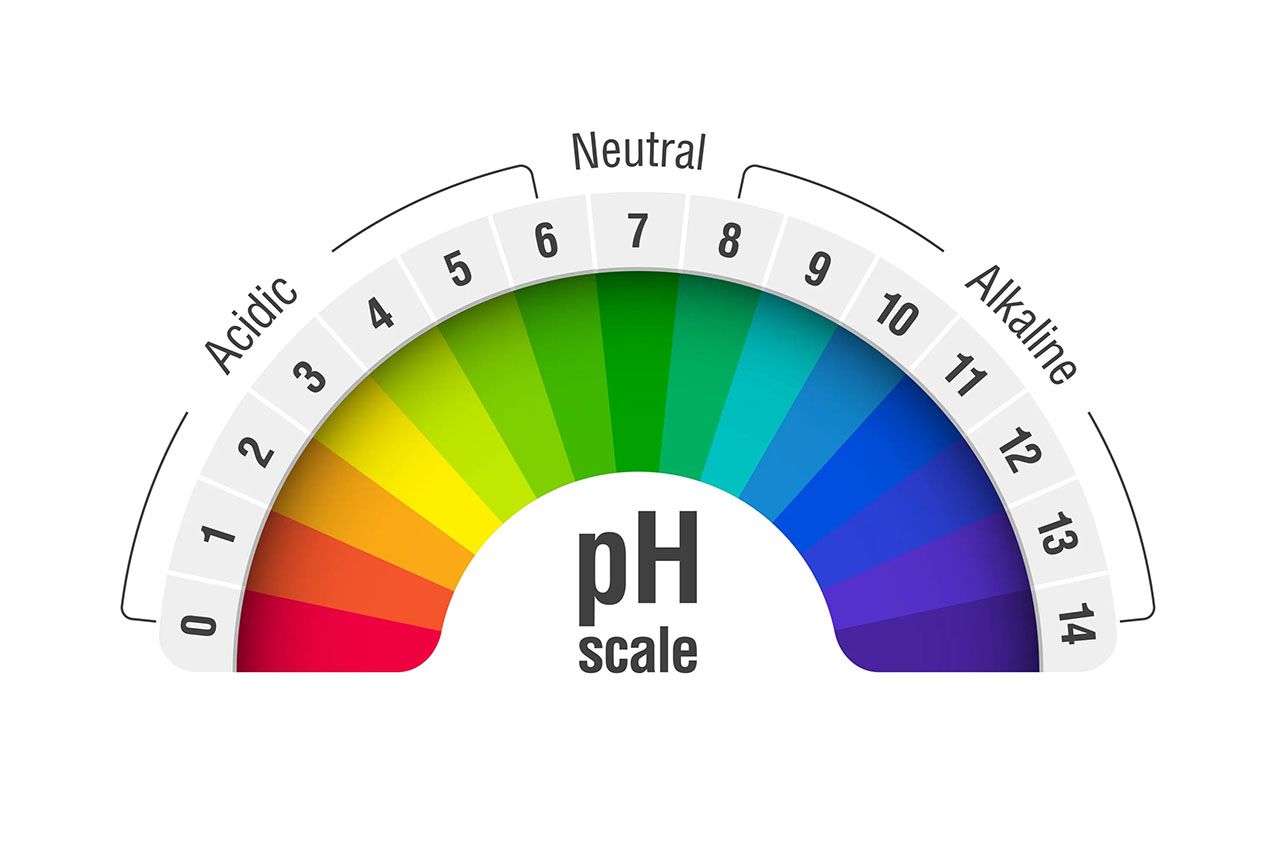

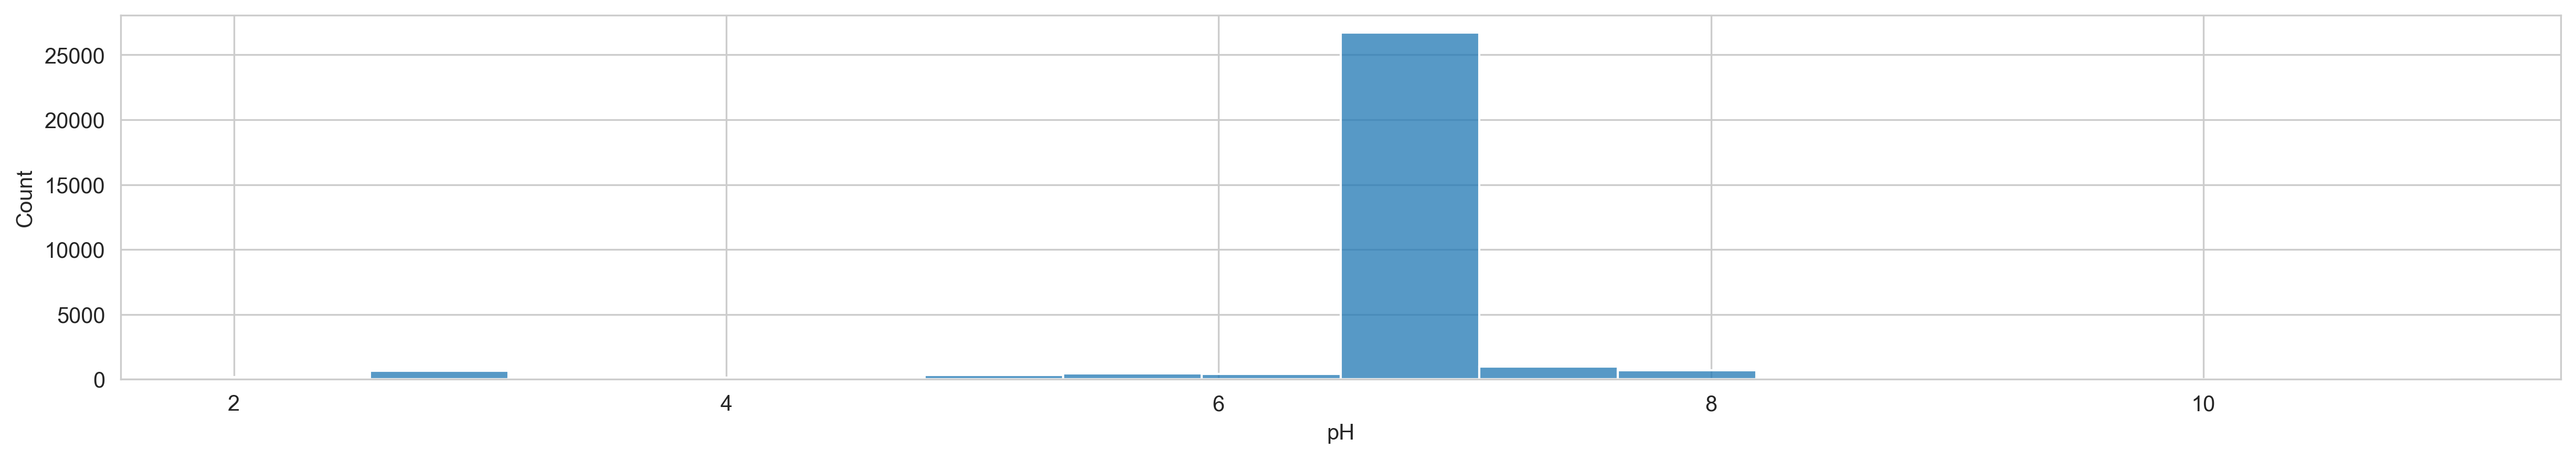

In [23]:
ax,fig = plt.subplots(figsize=(20,3),dpi=300)
ax = sns.histplot(x=df_one_two['pH'])


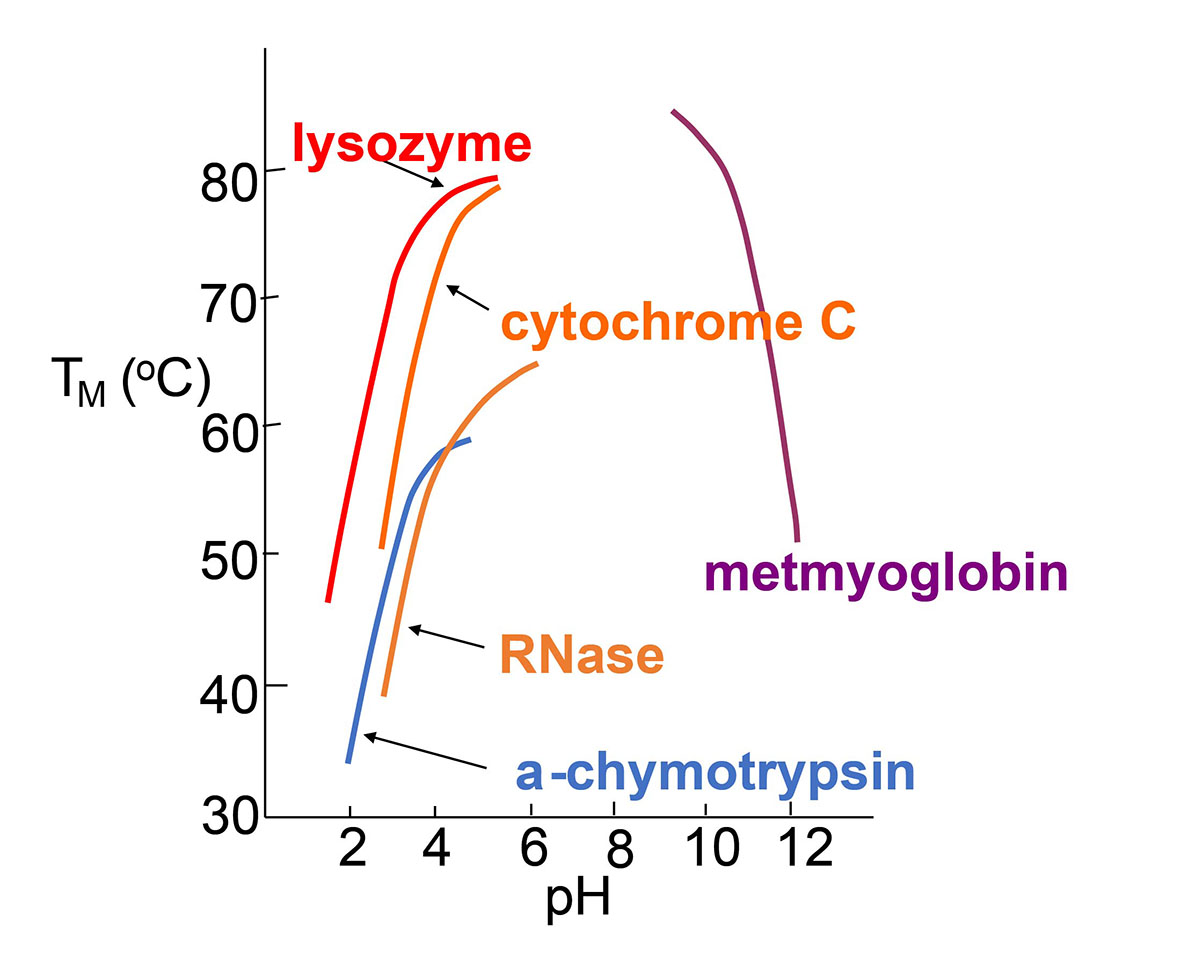

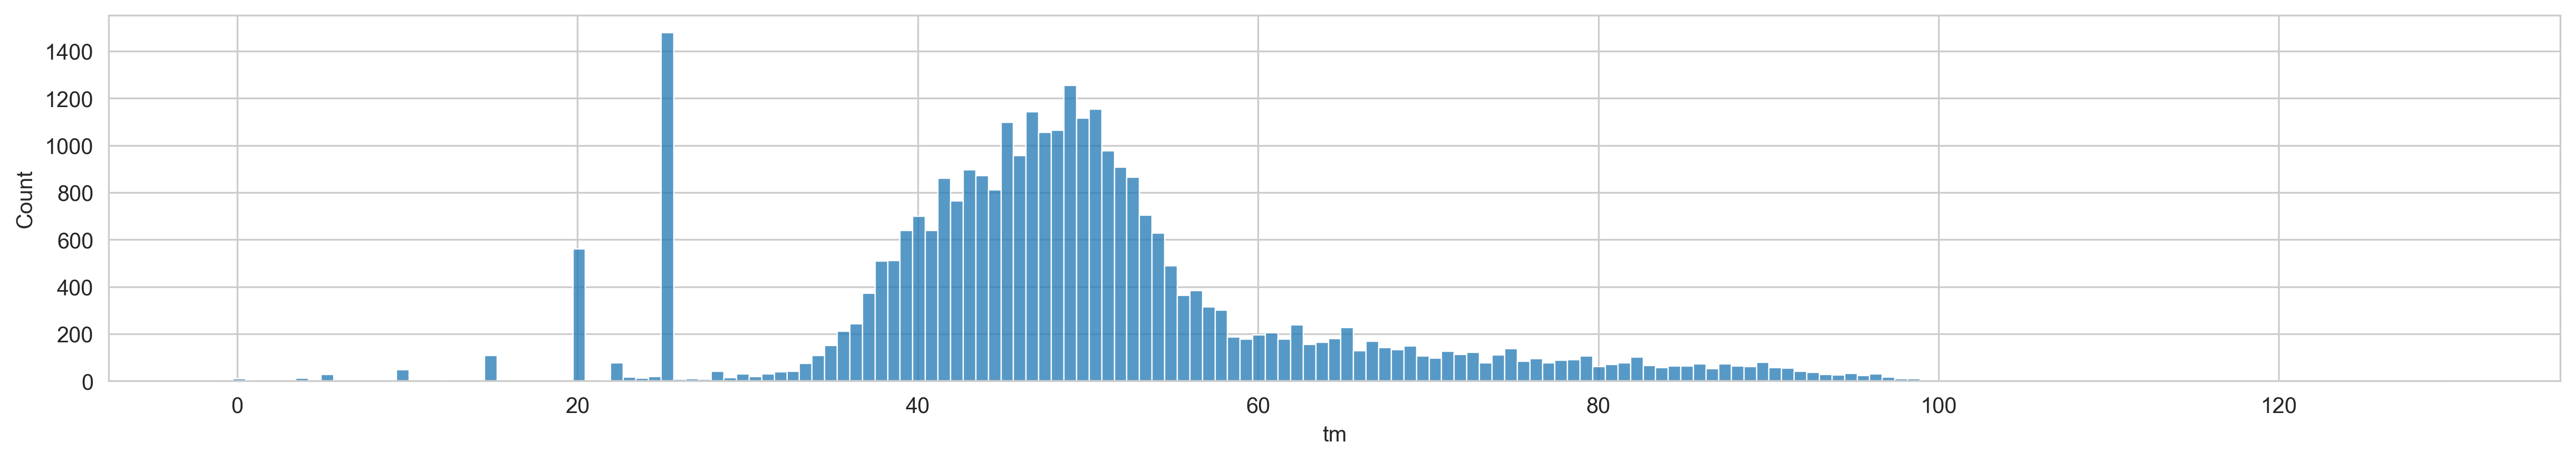

In [24]:
ax,fig = plt.subplots(figsize=(20,3),dpi=300)
ax = sns.histplot(x=df_one_two['tm'])

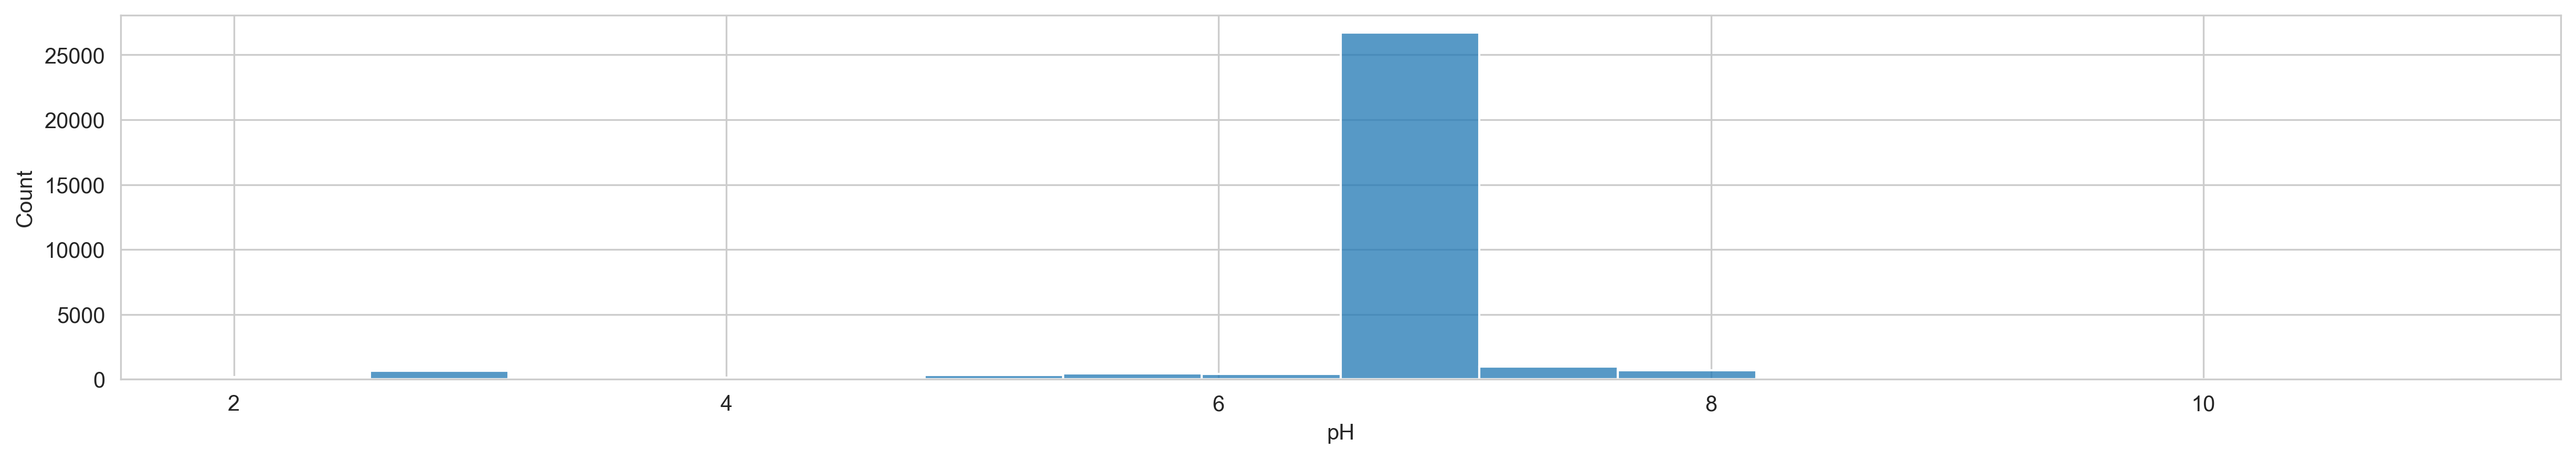

In [82]:
ax,fig = plt.subplots(figsize=(20,3),dpi=300)
ax = sns.histplot(x=df_one_two['pH'])

# Drop outliers

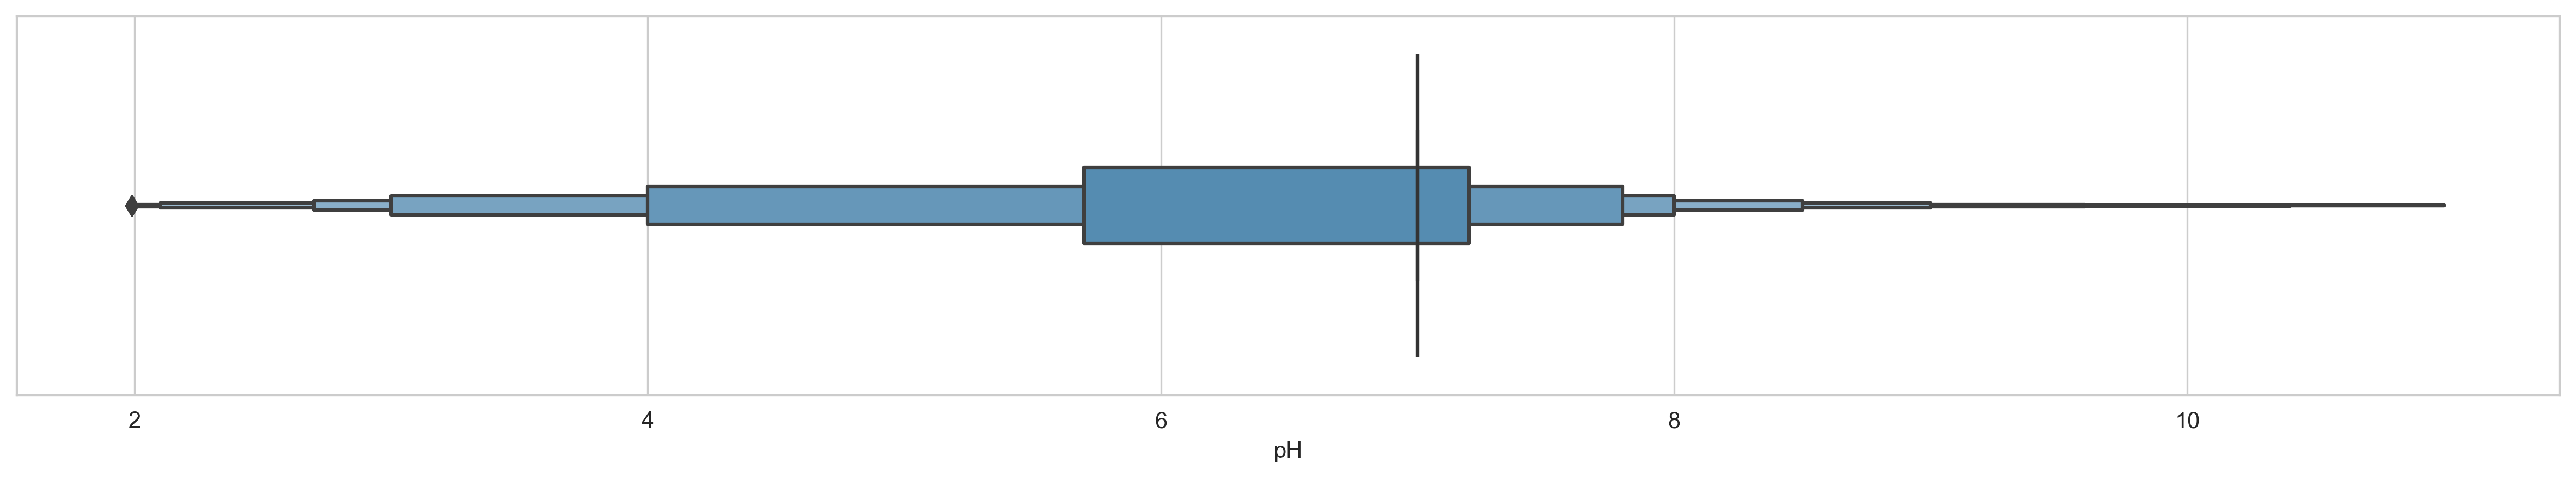

In [83]:
ax,fig = plt.subplots(figsize=(20,3),dpi=300)
ax = sns.boxenplot(x=df_one_two['pH'])

In [85]:
# outlier = df_one_two.copy()
#
# lower_bound = outlier['pH'].mean() - 3*outlier['pH'].std()
# higher_bound = outlier['pH'].mean() + 3*outlier['pH'].std()
# outlier = outlier[(outlier['pH'] > lower_bound) & (outlier['pH'] < higher_bound)]

# Multivariate graphs

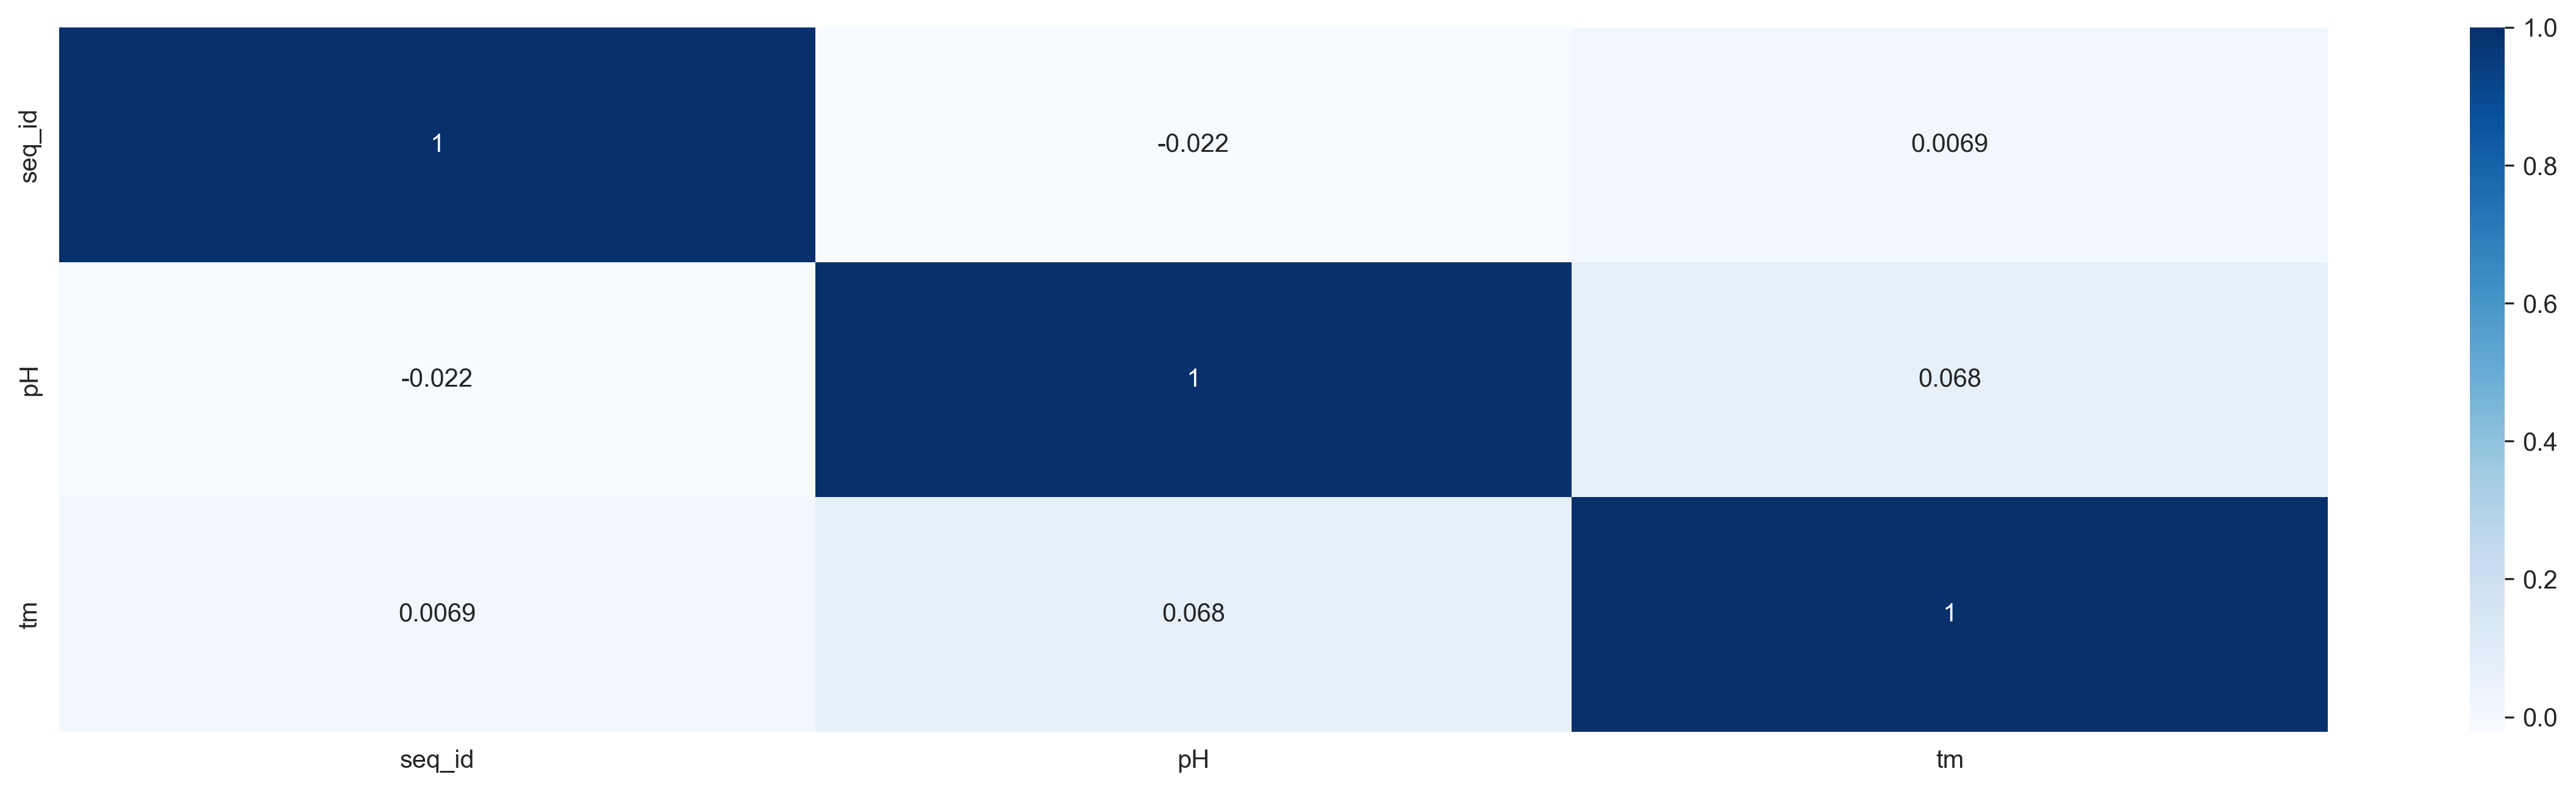

In [26]:
cor = df_one_two.drop('protein_sequence', axis=1).corr()
ax,fig = plt.subplots(figsize=(20,5),dpi=300)
ax = sns.heatmap(data=cor,annot=True,cmap='Blues')

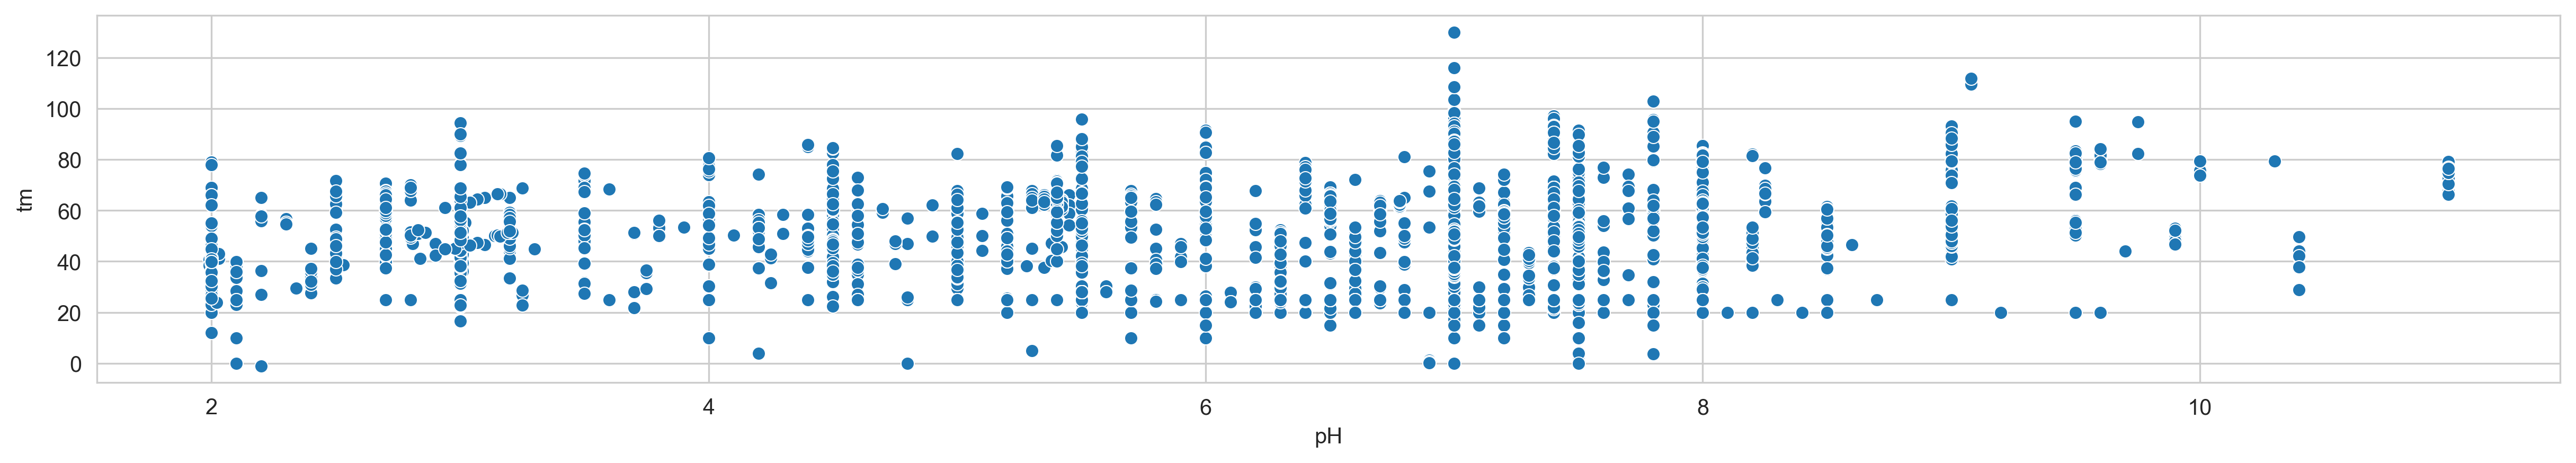

In [27]:
ax,fig = plt.subplots(figsize=(20,3),dpi=300)
ax = sns.scatterplot(x=df_one_two['pH'],y=df_one_two['tm'])

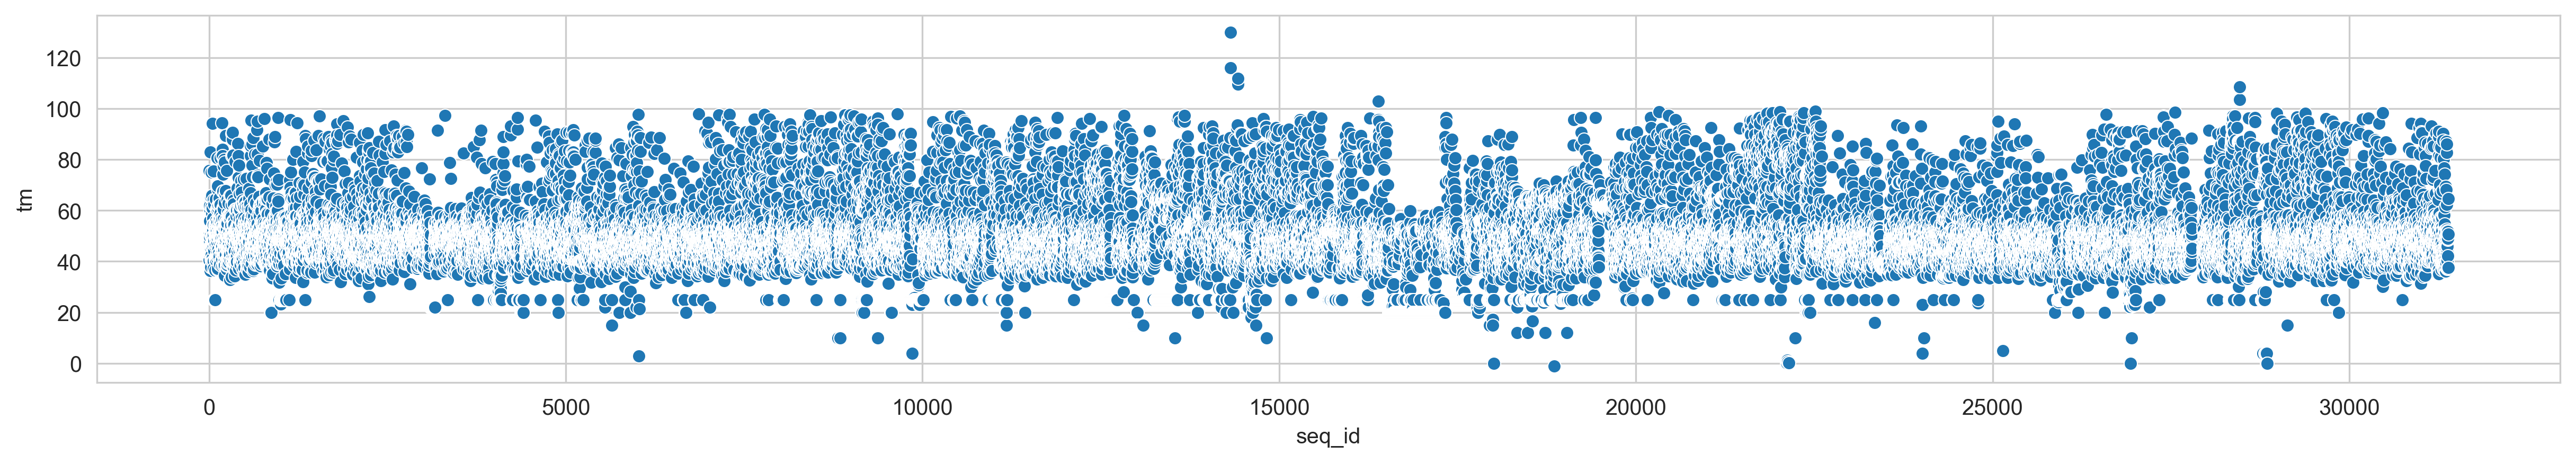

In [28]:
ax,fig = plt.subplots(figsize=(20,3),dpi=300)
ax = sns.scatterplot(x=df_one_two['seq_id'],y=df_one_two['tm'])

In [29]:
df_one_two.head()

seq_id                                   protein_sequence   pH    tm
0       0  AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0  75.7
1       1  AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0  50.5
2       2  AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0  40.5
3       3  AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...  7.0  47.2
4       4  AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...  7.0  49.5

# Feature Engineering & Transformations

In [30]:
X = df_one_two.drop(['tm'],axis=1)
y = df_one_two['tm']

In [31]:
#!pip install scikit-learn

In [32]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# Transform X

In [33]:
#!pip install Bio
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [34]:
def transform_X(X):

    ################################ molecular_weight + instability_index + isoelectric_point + length ################################
    for i in tqdm(range(len(X))):
        analysed_seq = ProteinAnalysis(X['protein_sequence'][i])
        X.loc[i,'molecular_weight'] = analysed_seq.molecular_weight()
        X.loc[i,'instability_index'] = analysed_seq.instability_index()
        X.loc[i,'isoelectric_point'] = analysed_seq.isoelectric_point()
        X.loc[i,'length'] = analysed_seq.length
    ################################## get_amino_acids_percent the data ################################
    df = pd.DataFrame(np.zeros((len(X),20)))
    df.columns = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
    for i in tqdm(range(len(X))):
        analysed_seq = ProteinAnalysis(X['protein_sequence'][i])
        dict = analysed_seq.get_amino_acids_percent()
        df.iloc[i,:] = dict
    ################################### Merge the dataframes ################################
    df_merged = pd.concat([X,df],axis=1)

    ################################ output ################################
    return df_merged

In [35]:
X_transformed_progress = transform_X(X)
X_transformed_progress

100%|██████████| 31104/31104 [00:03<00:00, 8269.65it/s]


seq_id                                   protein_sequence   pH  \
0           0  AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0   
1           1  AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0   
2           2  AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0   
3           3  AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...  7.0   
4           4  AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...  7.0   
...       ...                                                ...  ...   
31099   31385  YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...  7.0   
31100   31386  YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...  7.0   
31101   31387  YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...  7.0   
31102   31388  YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...  7.0   
31103   31389  YYVPDEYWQSLEVAHKLTFGYGYLTWEWVQGIRSYVYPLLIAGLYK...  7.0   

       molecular_weight  instability_index  isoelectric_point  length  \
0            36320.7244          28.389736           6.109589   341.0   
1            32837.9931          65.108392           5.144349   286.0   
2            53428.8034          35.089336           9.032101   497.0   
3            29475.5996          50.502264           4.683840   265.0   
4           158761.9814          45.668808           5.917928  1451.0   
...                 ...                ...                ...     ...   
31099        61997.6230          48.604026           8.466327   549.0   
31100        52637.6897          35.285096           6.532244   469.0   
31101        14203.9225          44.198437           5.271214   128.0   
31102        64367.8724          36.618398           5.688128   593.0   
31103        62272.3908          43.210838           7.139853   537.0   

              A         C         D  ...         M         N         P  \
0      0.131965  0.002933  0.038123  ...  0.023460  0.014663  0.052786   
1      0.097902  0.000000  0.034965  ...  0.006993  0.020979  0.027972   
2      0.100604  0.018109  0.054326  ...  0.012072  0.030181  0.040241   
3      0.075472  0.018868  0.071698  ...  0.007547  0.033962  0.060377   
4      0.059269  0.009649  0.053756  ...  0.021365  0.044797  0.088215   
...         ...       ...       ...  ...       ...       ...       ...   
31099  0.060109  0.021858  0.069217  ...  0.023679  0.043716  0.045537   
31100  0.078891  0.010661  0.044776  ...  0.029851  0.040512  0.040512   
31101  0.101562  0.007812  0.054688  ...  0.054688  0.039062  0.046875   
31102  0.079258  0.008432  0.057336  ...  0.043845  0.042159  0.052277   
31103  0.063315  0.009311  0.027933  ...  0.013035  0.037244  0.057728   

              Q         R         S         T         V         W         Y  
0      0.017595  0.073314  0.032258  0.041056  0.108504  0.011730  0.008798  
1      0.076923  0.104895  0.048951  0.041958  0.045455  0.010490  0.010490  
2      0.050302  0.062374  0.066398  0.060362  0.060362  0.006036  0.032193  
3      0.033962  0.037736  0.060377  0.071698  0.052830  0.011321  0.015094  
4      0.037216  0.043418  0.101999  0.082702  0.085458  0.011027  0.032391  
...         ...       ...       ...       ...       ...       ...       ...  
31099  0.043716  0.076503  0.060109  0.032787  0.076503  0.023679  0.032787  
31100  0.034115  0.053305  0.078891  0.055437  0.072495  0.010661  0.029851  
31101  0.062500  0.023438  0.078125  0.046875  0.054688  0.031250  0.031250  
31102  0.020236  0.042159  0.086003  0.053963  0.080944  0.005059  0.030354  
31103  0.033520  0.052142  0.063315  0.054004  0.070764  0.033520  0.054004  

[31104 rows x 27 columns]

# Get the distance between the sequences

In [36]:
X_transformed = X_transformed_progress.copy()

In [37]:
#!pip install Levenshtein
import Levenshtein

In [38]:
wild_type = 'VPVNPEPDATSVENVALKTGSGDSQSDPIKADLEVKGQSALPFDVDCWAILCKGAPNVLQRVNEKTKNSNRDRSGANKGPFKDPQKWGIKALPPKNPSWSAQDFKSPEEYAFASSLQGGTNAILAPVNLASQNSQGGVLNGFYSANKVAQFDPSKPQQTKGTWFQITKFTGAAGPYCKALGSNDKSVCDKNKNIAGDWGFDPAKWAYQYDEKNNKFNYVGK'

In [39]:
def mutation(df,wild_type):
    for i,row in tqdm(enumerate(df['protein_sequence'])):
        lev_distance = Levenshtein.distance(wild_type,row)
        lev_ratio = Levenshtein.ratio(wild_type,row)
        lev_jaro = Levenshtein.jaro(wild_type,row)

        df.loc[i,'lev_distance'] = lev_distance
        df.loc[i,'lev_ratio'] = lev_ratio
        df.loc[i,'lev_jaro'] = lev_jaro

    return df

In [40]:
X_transformed = mutation(X_transformed,wild_type)
X_transformed

31104it [00:03, 9235.14it/s]


seq_id                                   protein_sequence   pH  \
0           0  AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0   
1           1  AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0   
2           2  AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0   
3           3  AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...  7.0   
4           4  AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...  7.0   
...       ...                                                ...  ...   
31099   31385  YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...  7.0   
31100   31386  YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...  7.0   
31101   31387  YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...  7.0   
31102   31388  YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...  7.0   
31103   31389  YYVPDEYWQSLEVAHKLTFGYGYLTWEWVQGIRSYVYPLLIAGLYK...  7.0   

       molecular_weight  instability_index  isoelectric_point  length  \
0            36320.7244          28.389736           6.109589   341.0   
1            32837.9931          65.108392           5.144349   286.0   
2            53428.8034          35.089336           9.032101   497.0   
3            29475.5996          50.502264           4.683840   265.0   
4           158761.9814          45.668808           5.917928  1451.0   
...                 ...                ...                ...     ...   
31099        61997.6230          48.604026           8.466327   549.0   
31100        52637.6897          35.285096           6.532244   469.0   
31101        14203.9225          44.198437           5.271214   128.0   
31102        64367.8724          36.618398           5.688128   593.0   
31103        62272.3908          43.210838           7.139853   537.0   

              A         C         D  ...         Q         R         S  \
0      0.131965  0.002933  0.038123  ...  0.017595  0.073314  0.032258   
1      0.097902  0.000000  0.034965  ...  0.076923  0.104895  0.048951   
2      0.100604  0.018109  0.054326  ...  0.050302  0.062374  0.066398   
3      0.075472  0.018868  0.071698  ...  0.033962  0.037736  0.060377   
4      0.059269  0.009649  0.053756  ...  0.037216  0.043418  0.101999   
...         ...       ...       ...  ...       ...       ...       ...   
31099  0.060109  0.021858  0.069217  ...  0.043716  0.076503  0.060109   
31100  0.078891  0.010661  0.044776  ...  0.034115  0.053305  0.078891   
31101  0.101562  0.007812  0.054688  ...  0.062500  0.023438  0.078125   
31102  0.079258  0.008432  0.057336  ...  0.020236  0.042159  0.086003   
31103  0.063315  0.009311  0.027933  ...  0.033520  0.052142  0.063315   

              T         V         W         Y  lev_distance  lev_ratio  \
0      0.041056  0.108504  0.011730  0.008798         271.0   0.323843   
1      0.041958  0.045455  0.010490  0.010490         231.0   0.331361   
2      0.060362  0.060362  0.006036  0.032193         397.0   0.311978   
3      0.071698  0.052830  0.011321  0.015094         211.0   0.345679   
4      0.082702  0.085458  0.011027  0.032391        1280.0   0.205742   
...         ...       ...       ...       ...           ...        ...   
31099  0.032787  0.076503  0.023679  0.032787         441.0   0.306494   
31100  0.055437  0.072495  0.010661  0.029851         374.0   0.324638   
31101  0.046875  0.054688  0.031250  0.031250         169.0   0.366762   
31102  0.053963  0.080944  0.005059  0.030354         477.0   0.304668   
31103  0.054004  0.070764  0.033520  0.054004         432.0   0.313984   

       lev_jaro  
0      0.612160  
1      0.634938  
2      0.642763  
3      0.697307  
4      0.565098  
...         ...  
31099  0.647004  
31100  0.654000  
31101  0.655207  
31102  0.626533  
31103  0.614060  

[31104 rows x 30 columns]

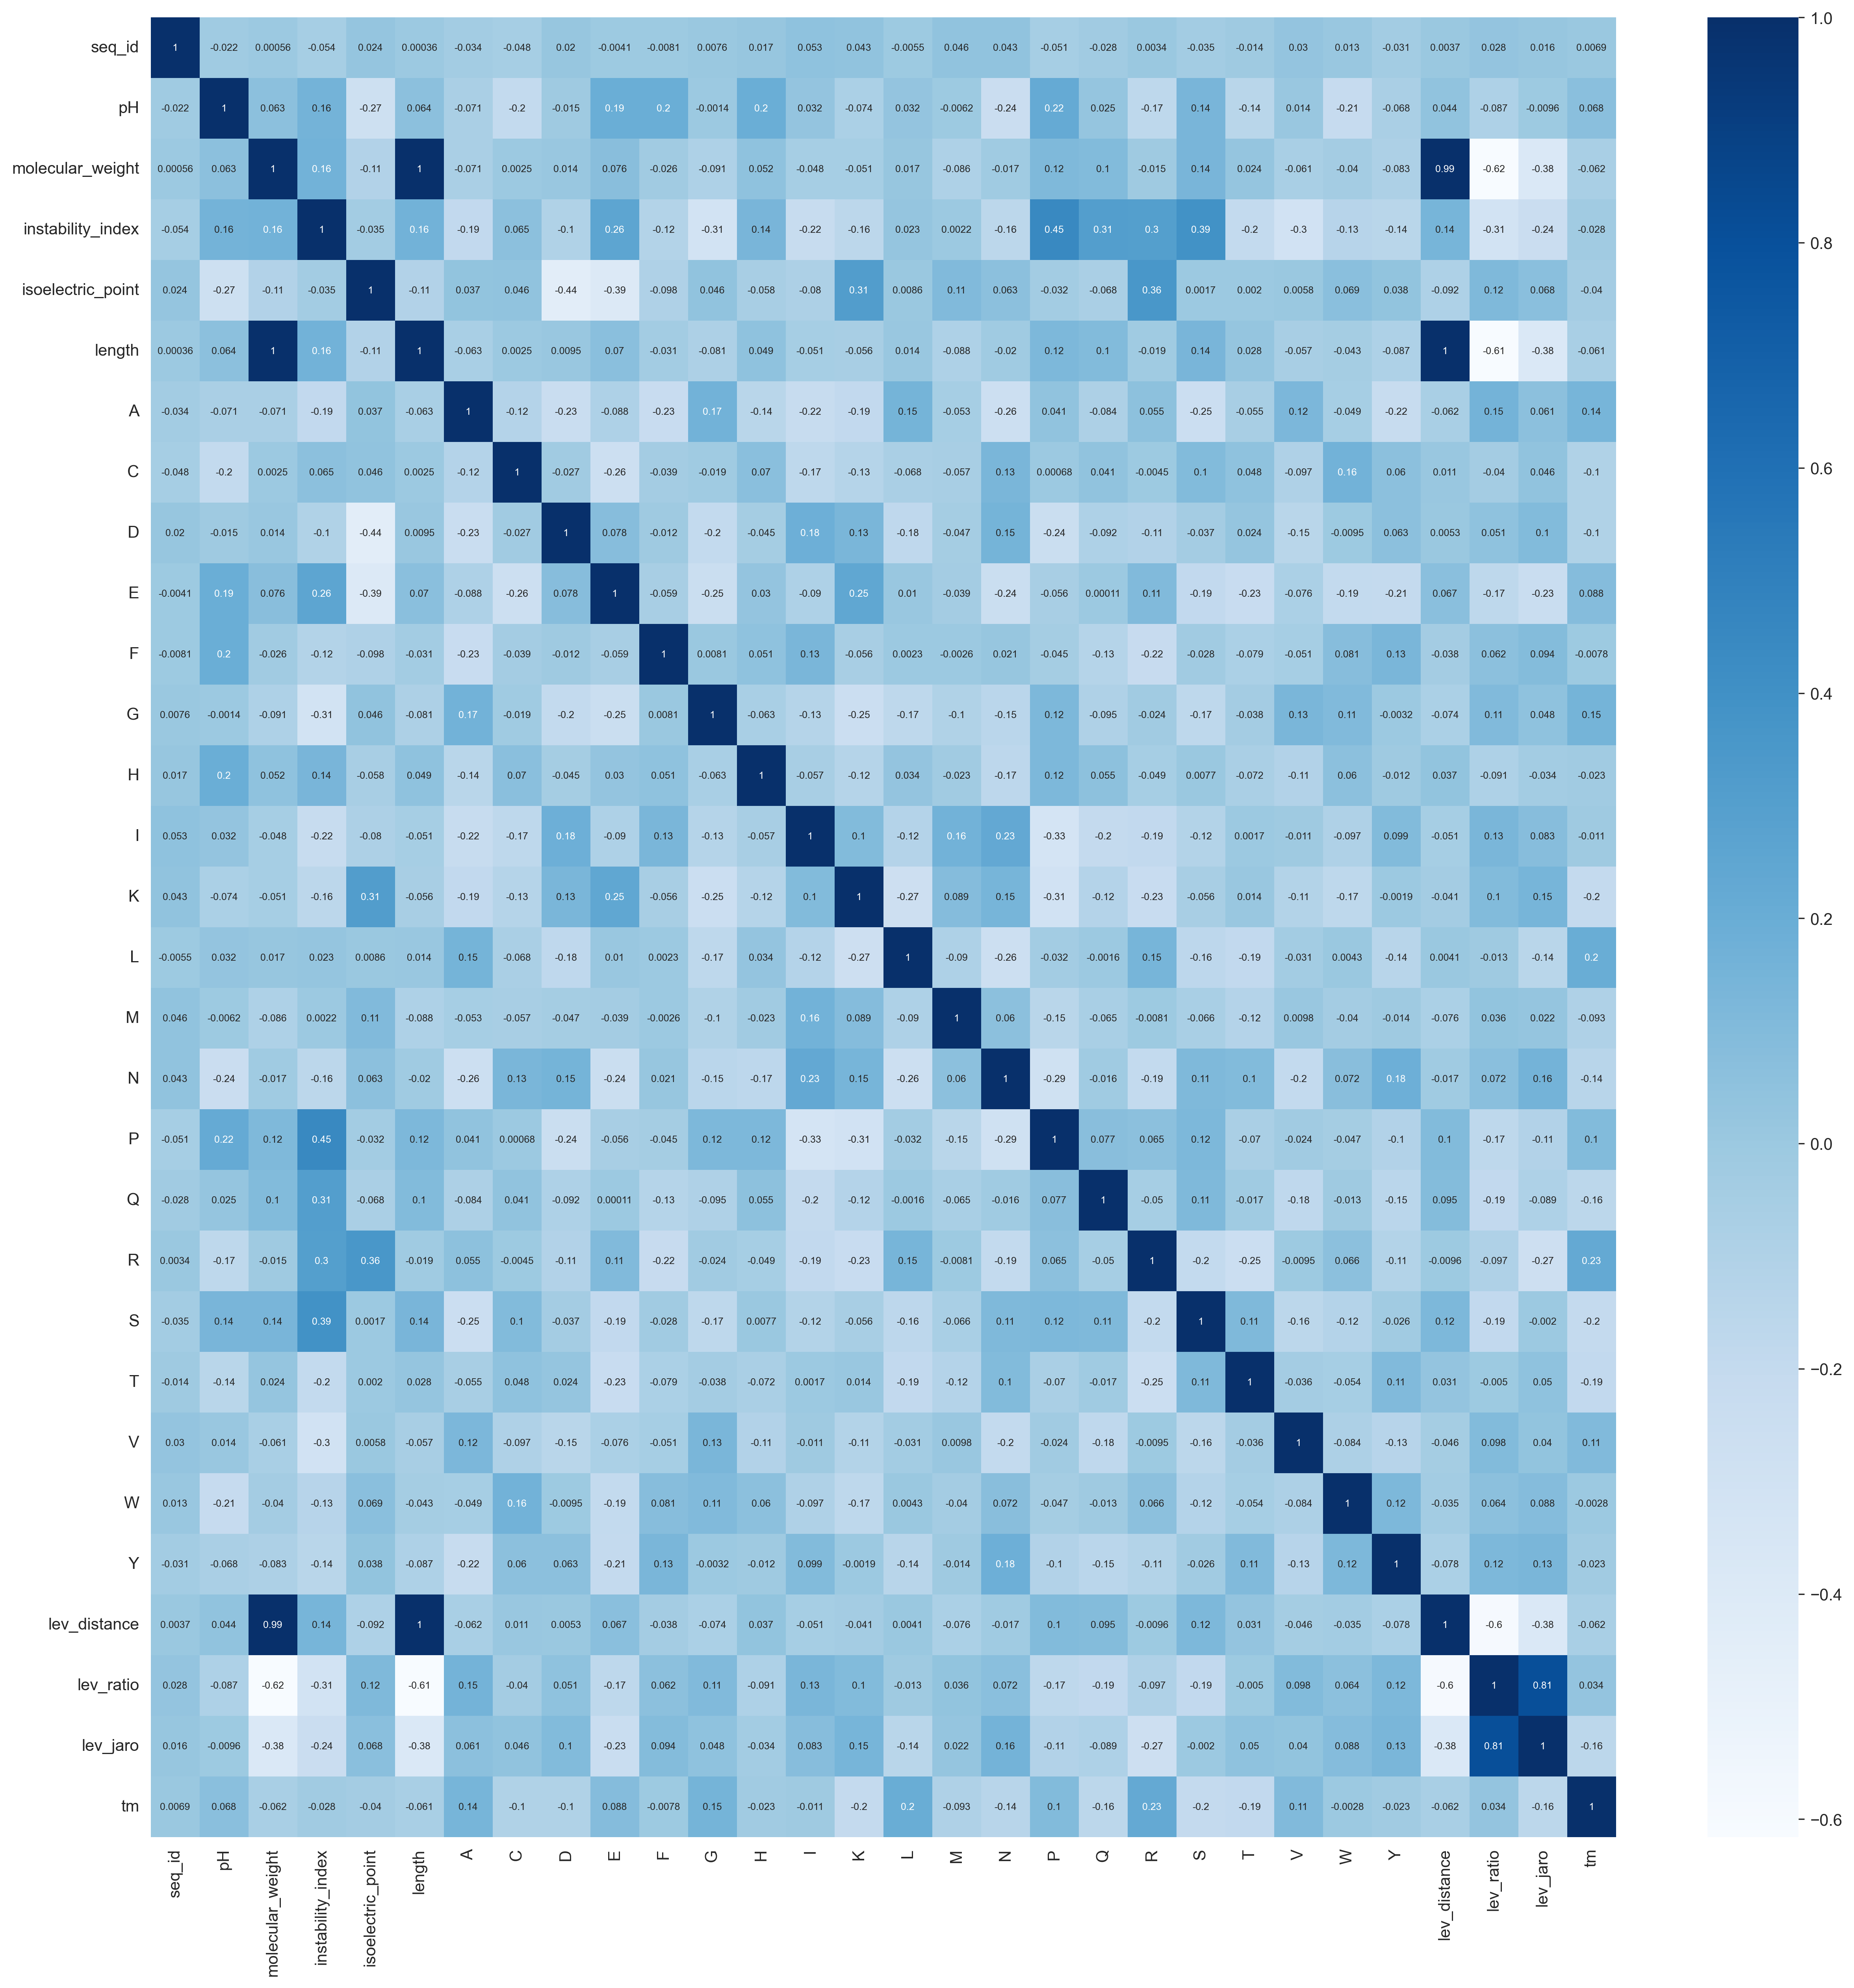

In [41]:
full_df = pd.concat([X_transformed.drop('protein_sequence',axis=1),y],axis=1)
cor = full_df.corr()
ax,fig = plt.subplots(figsize=(20,20),dpi=300)
ax = sns.heatmap(data=cor,annot=True,cmap='Blues',annot_kws={"size":6});

# Transform validation data

In [42]:
def transform_V(Validation_data):

    ################################ molecular_weight + instability_index + isoelectric_point + length ################################
    for i in tqdm(range(len(Validation_data))):
        analysed_seq = ProteinAnalysis(Validation_data['protein_sequence'][i])
        Validation_data.loc[i,'molecular_weight'] = analysed_seq.molecular_weight()
        Validation_data.loc[i,'instability_index'] = analysed_seq.instability_index()
        Validation_data.loc[i,'isoelectric_point'] = analysed_seq.isoelectric_point()
        Validation_data.loc[i,'length'] = analysed_seq.length
    ################################## get_amino_acids_percent the data ################################
    df = pd.DataFrame(np.zeros((len(Validation_data),20)))
    df.columns = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
    for i in tqdm(range(len(Validation_data))):
        analysed_seq = ProteinAnalysis(Validation_data['protein_sequence'][i])
        dict = analysed_seq.get_amino_acids_percent()
        df.iloc[i,:] = dict
    ################################### Merge the dataframes ################################
    df_merged = pd.concat([Validation_data,df],axis=1)

    ################################ output ################################
    return df_merged

In [43]:
validation_data_transformed = transform_V(validation_data)
validation_data_transformed

100%|██████████| 2413/2413 [00:00<00:00, 8686.74it/s]


seq_id                                   protein_sequence  pH  \
0      31390  VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   
1      31391  VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   
2      31392  VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...   8   
3      31393  VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   
4      31394  VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   
...      ...                                                ...  ..   
2408   33798  VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   
2409   33799  VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   
2410   33800  VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   
2411   33801  VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   
2412   33802  VPVNPEPDATSVENVWLKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   

      molecular_weight  instability_index  isoelectric_point  length  \
0           23910.2619          43.819955           8.751535   221.0   
1           23909.3202          43.819955           9.024494   221.0   
2           23781.1479          43.973682           8.907484   220.0   
3           23869.2761          45.295068           8.699638   221.0   
4           23913.3070          43.819955           8.761012   221.0   
...                ...                ...                ...     ...   
2408        23936.3852          44.307285           8.907484   221.0   
2409        23936.3852          43.435792           8.907484   221.0   
2410        23937.3302          43.435792           8.907484   221.0   
2411        23920.3428          44.307285           8.907484   221.0   
2412        24009.4375          43.994163           8.907484   221.0   

             A         C         D  ...    M         N         P         Q  \
0     0.099548  0.018100  0.067873  ...  0.0  0.085973  0.076923  0.058824   
1     0.099548  0.018100  0.067873  ...  0.0  0.085973  0.076923  0.058824   
2     0.100000  0.018182  0.068182  ...  0.0  0.086364  0.077273  0.059091   
3     0.099548  0.022624  0.067873  ...  0.0  0.085973  0.076923  0.058824   
4     0.099548  0.018100  0.067873  ...  0.0  0.085973  0.076923  0.058824   
...        ...       ...       ...  ...  ...       ...       ...       ...   
2408  0.095023  0.018100  0.067873  ...  0.0  0.085973  0.076923  0.058824   
2409  0.095023  0.018100  0.067873  ...  0.0  0.085973  0.076923  0.058824   
2410  0.095023  0.018100  0.067873  ...  0.0  0.090498  0.076923  0.058824   
2411  0.095023  0.018100  0.067873  ...  0.0  0.085973  0.081448  0.058824   
2412  0.095023  0.018100  0.067873  ...  0.0  0.085973  0.076923  0.058824   

             R         S         T         V         W         Y  
0     0.013575  0.081448  0.036199  0.058824  0.027149  0.027149  
1     0.013575  0.081448  0.036199  0.058824  0.027149  0.027149  
2     0.013636  0.081818  0.036364  0.059091  0.027273  0.027273  
3     0.013575  0.081448  0.036199  0.058824  0.027149  0.027149  
4     0.013575  0.081448  0.036199  0.058824  0.027149  0.027149  
...        ...       ...       ...       ...       ...       ...  
2408  0.013575  0.081448  0.036199  0.058824  0.027149  0.027149  
2409  0.013575  0.081448  0.036199  0.058824  0.027149  0.027149  
2410  0.013575  0.081448  0.036199  0.058824  0.027149  0.027149  
2411  0.013575  0.081448  0.036199  0.058824  0.027149  0.027149  
2412  0.013575  0.081448  0.036199  0.058824  0.031674  0.027149  

[2413 rows x 27 columns]

In [44]:
validation_data_transformed = mutation(validation_data_transformed,wild_type)
validation_data_transformed

2413it [00:00, 10427.08it/s]


seq_id                                   protein_sequence  pH  \
0      31390  VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   
1      31391  VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   
2      31392  VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...   8   
3      31393  VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   
4      31394  VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   
...      ...                                                ...  ..   
2408   33798  VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   
2409   33799  VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   
2410   33800  VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   
2411   33801  VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   
2412   33802  VPVNPEPDATSVENVWLKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   

      molecular_weight  instability_index  isoelectric_point  length  \
0           23910.2619          43.819955           8.751535   221.0   
1           23909.3202          43.819955           9.024494   221.0   
2           23781.1479          43.973682           8.907484   220.0   
3           23869.2761          45.295068           8.699638   221.0   
4           23913.3070          43.819955           8.761012   221.0   
...                ...                ...                ...     ...   
2408        23936.3852          44.307285           8.907484   221.0   
2409        23936.3852          43.435792           8.907484   221.0   
2410        23937.3302          43.435792           8.907484   221.0   
2411        23920.3428          44.307285           8.907484   221.0   
2412        24009.4375          43.994163           8.907484   221.0   

             A         C         D  ...         Q         R         S  \
0     0.099548  0.018100  0.067873  ...  0.058824  0.013575  0.081448   
1     0.099548  0.018100  0.067873  ...  0.058824  0.013575  0.081448   
2     0.100000  0.018182  0.068182  ...  0.059091  0.013636  0.081818   
3     0.099548  0.022624  0.067873  ...  0.058824  0.013575  0.081448   
4     0.099548  0.018100  0.067873  ...  0.058824  0.013575  0.081448   
...        ...       ...       ...  ...       ...       ...       ...   
2408  0.095023  0.018100  0.067873  ...  0.058824  0.013575  0.081448   
2409  0.095023  0.018100  0.067873  ...  0.058824  0.013575  0.081448   
2410  0.095023  0.018100  0.067873  ...  0.058824  0.013575  0.081448   
2411  0.095023  0.018100  0.067873  ...  0.058824  0.013575  0.081448   
2412  0.095023  0.018100  0.067873  ...  0.058824  0.013575  0.081448   

             T         V         W         Y  lev_distance  lev_ratio  \
0     0.036199  0.058824  0.027149  0.027149           1.0   0.995475   
1     0.036199  0.058824  0.027149  0.027149           1.0   0.995475   
2     0.036364  0.059091  0.027273  0.027273           1.0   0.997732   
3     0.036199  0.058824  0.027149  0.027149           1.0   0.995475   
4     0.036199  0.058824  0.027149  0.027149           1.0   0.995475   
...        ...       ...       ...       ...           ...        ...   
2408  0.036199  0.058824  0.027149  0.027149           1.0   0.995475   
2409  0.036199  0.058824  0.027149  0.027149           1.0   0.995475   
2410  0.036199  0.058824  0.027149  0.027149           1.0   0.995475   
2411  0.036199  0.058824  0.027149  0.027149           1.0   0.995475   
2412  0.036199  0.058824  0.031674  0.027149           1.0   0.995475   

      lev_jaro  
0     0.972741  
1     0.966680  
2     0.880310  
3     0.874256  
4     0.992438  
...        ...  
2408  0.987892  
2409  0.977286  
2410  0.989408  
2411  0.993953  
2412  0.995468  

[2413 rows x 30 columns]

# Split the data into training & testing

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.2)

X_train = X_train.reset_index(drop=True).drop('protein_sequence',axis=1)
y_train = pd.Series(y_train).reset_index(drop=True)

X_test = X_test.reset_index(drop=True).drop('protein_sequence',axis=1)
y_test = pd.Series(y_test).reset_index(drop=True)

z_test = validation_data_transformed.copy()
z_test = z_test.drop('protein_sequence',axis=1)

z_test.head(1)

seq_id  pH  molecular_weight  instability_index  isoelectric_point  length  \
0   31390   8        23910.2619          43.819955           8.751535   221.0   

          A       C         D         E  ...         Q         R         S  \
0  0.099548  0.0181  0.067873  0.036199  ...  0.058824  0.013575  0.081448   

          T         V         W         Y  lev_distance  lev_ratio  lev_jaro  
0  0.036199  0.058824  0.027149  0.027149           1.0   0.995475  0.972741  

[1 rows x 29 columns]

In [46]:
z_test

seq_id  pH  molecular_weight  instability_index  isoelectric_point  \
0      31390   8        23910.2619          43.819955           8.751535   
1      31391   8        23909.3202          43.819955           9.024494   
2      31392   8        23781.1479          43.973682           8.907484   
3      31393   8        23869.2761          45.295068           8.699638   
4      31394   8        23913.3070          43.819955           8.761012   
...      ...  ..               ...                ...                ...   
2408   33798   8        23936.3852          44.307285           8.907484   
2409   33799   8        23936.3852          43.435792           8.907484   
2410   33800   8        23937.3302          43.435792           8.907484   
2411   33801   8        23920.3428          44.307285           8.907484   
2412   33802   8        24009.4375          43.994163           8.907484   

      length         A         C         D         E  ...         Q         R  \
0      221.0  0.099548  0.018100  0.067873  0.036199  ...  0.058824  0.013575   
1      221.0  0.099548  0.018100  0.067873  0.031674  ...  0.058824  0.013575   
2      220.0  0.100000  0.018182  0.068182  0.031818  ...  0.059091  0.013636   
3      221.0  0.099548  0.022624  0.067873  0.031674  ...  0.058824  0.013575   
4      221.0  0.099548  0.018100  0.067873  0.031674  ...  0.058824  0.013575   
...      ...       ...       ...       ...       ...  ...       ...       ...   
2408   221.0  0.095023  0.018100  0.067873  0.031674  ...  0.058824  0.013575   
2409   221.0  0.095023  0.018100  0.067873  0.031674  ...  0.058824  0.013575   
2410   221.0  0.095023  0.018100  0.067873  0.031674  ...  0.058824  0.013575   
2411   221.0  0.095023  0.018100  0.067873  0.031674  ...  0.058824  0.013575   
2412   221.0  0.095023  0.018100  0.067873  0.031674  ...  0.058824  0.013575   

             S         T         V         W         Y  lev_distance  \
0     0.081448  0.036199  0.058824  0.027149  0.027149           1.0   
1     0.081448  0.036199  0.058824  0.027149  0.027149           1.0   
2     0.081818  0.036364  0.059091  0.027273  0.027273           1.0   
3     0.081448  0.036199  0.058824  0.027149  0.027149           1.0   
4     0.081448  0.036199  0.058824  0.027149  0.027149           1.0   
...        ...       ...       ...       ...       ...           ...   
2408  0.081448  0.036199  0.058824  0.027149  0.027149           1.0   
2409  0.081448  0.036199  0.058824  0.027149  0.027149           1.0   
2410  0.081448  0.036199  0.058824  0.027149  0.027149           1.0   
2411  0.081448  0.036199  0.058824  0.027149  0.027149           1.0   
2412  0.081448  0.036199  0.058824  0.031674  0.027149           1.0   

      lev_ratio  lev_jaro  
0      0.995475  0.972741  
1      0.995475  0.966680  
2      0.997732  0.880310  
3      0.995475  0.874256  
4      0.995475  0.992438  
...         ...       ...  
2408   0.995475  0.987892  
2409   0.995475  0.977286  
2410   0.995475  0.989408  
2411   0.995475  0.993953  
2412   0.995475  0.995468  

[2413 rows x 29 columns]

In [47]:
X_train

seq_id   pH  molecular_weight  instability_index  isoelectric_point  \
0       11925  7.0        67881.8209          49.668553           5.691538   
1       11355  7.0        17615.3875          52.967320           8.686099   
2       14749  7.0        22170.5989          30.660377           5.568766   
3       18760  5.4        18705.3701          32.488415           9.594137   
4        2479  7.0        16939.9473          67.135616           8.161714   
...       ...  ...               ...                ...                ...   
24878   26024  6.3         9368.7072          28.325000           6.576408   
24879   25591  7.0        22598.6544          48.238000           8.275113   
24880    3986  8.0        30777.5872          23.733217           5.500162   
24881   25355  7.0       123098.8994          51.648183           8.327913   
24882    1286  7.0        45945.7810          27.308137           7.306618   

       length         A         C         D         E  ...         Q  \
0       636.0  0.132075  0.006289  0.045597  0.061321  ...  0.072327   
1       153.0  0.039216  0.006536  0.058824  0.078431  ...  0.039216   
2       212.0  0.141509  0.014151  0.028302  0.075472  ...  0.023585   
3       164.0  0.091463  0.012195  0.060976  0.048780  ...  0.030488   
4       146.0  0.068493  0.054795  0.061644  0.082192  ...  0.027397   
...       ...       ...       ...       ...       ...  ...       ...   
24878    84.0  0.047619  0.000000  0.059524  0.095238  ...  0.035714   
24879   200.0  0.075000  0.025000  0.050000  0.065000  ...  0.065000   
24880   286.0  0.118881  0.017483  0.055944  0.073427  ...  0.041958   
24881  1090.0  0.073394  0.013761  0.058716  0.075229  ...  0.049541   
24882   408.0  0.058824  0.000000  0.075980  0.056373  ...  0.031863   

              R         S         T         V         W         Y  \
0      0.040881  0.067610  0.053459  0.070755  0.001572  0.015723   
1      0.078431  0.078431  0.026144  0.065359  0.000000  0.026144   
2      0.033019  0.042453  0.061321  0.099057  0.009434  0.018868   
3      0.079268  0.036585  0.067073  0.048780  0.018293  0.036585   
4      0.089041  0.102740  0.027397  0.027397  0.020548  0.020548   
...         ...       ...       ...       ...       ...       ...   
24878  0.059524  0.035714  0.059524  0.142857  0.011905  0.011905   
24879  0.080000  0.070000  0.025000  0.070000  0.005000  0.030000   
24880  0.038462  0.052448  0.052448  0.087413  0.020979  0.017483   
24881  0.054128  0.057798  0.038532  0.049541  0.005505  0.024771   
24882  0.026961  0.058824  0.053922  0.058824  0.019608  0.041667   

       lev_distance  lev_ratio  lev_jaro  
0             517.0   0.303384  0.608176  
1             177.0   0.304813  0.585363  
2             178.0   0.397229  0.655991  
3             172.0   0.358442  0.641964  
4             177.0   0.321526  0.632746  
...             ...        ...       ...  
24878         175.0   0.321311  0.607842  
24879         188.0   0.351544  0.674915  
24880         223.0   0.366864  0.700878  
24881         944.0   0.228833  0.583421  
24882         318.0   0.343402  0.676740  

[24883 rows x 29 columns]

In [48]:
def transform_split(X_train,X_test,X_valid):
    
    ################################ Transformers ################################
    scaler = MinMaxScaler()
    from sklearn.decomposition import PCA
    model_PCA = PCA(n_components=15)
    ################################ Training dataframe ################################

    ### Apply Standard scaler normalization to the data ###
    df_scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    print(f'Shape of scaled dataframes = {df_scaled_X_train.shape}')
    display(df_scaled_X_train.head(1))
    print('-'*80)

    ### Apply principal component analysis to reduce the columns ###
    df_decomposed_X_train = pd.DataFrame(model_PCA.fit_transform(df_scaled_X_train))
    print('*'*80)
    print(model_PCA.explained_variance_ratio_)
    print('*'*80)
    print(f'Shape of PCA = {df_decomposed_X_train.shape}')
    print('-'*80)

    ################################ testing dataframe ################################

    ### Apply Standard scaler normalization to the data ###
    df_scaled_X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    print(f'Shape of scaled dataframes = {df_scaled_X_test.shape}')
    display(df_scaled_X_test.head(1))
    print('-'*80)

    ### Apply principal component analysis to reduce the columns ###
    df_decomposed_X_test = pd.DataFrame(model_PCA.transform(df_scaled_X_test))
    print('*'*80)
    print(model_PCA.explained_variance_ratio_)
    print('*'*80)
    print(f'Shape of PCA = {df_decomposed_X_test.shape}')
    print('-'*80)
    
    ################################ validation dataframe ################################

    ### Apply Standard scaler normalization to the data ###
    df_scaled_X_valid = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns)
    print(f'Shape of scaled dataframes = {df_scaled_X_valid.shape}')
    display(df_scaled_X_valid.head(1))
    print('-'*80)

    ### Apply principal component analysis to reduce the columns ###
    df_decomposed_X_valid = pd.DataFrame(model_PCA.transform(df_scaled_X_valid))
    print('*'*80)
    print(model_PCA.explained_variance_ratio_)
    print('*'*80)
    print(f'Shape of PCA = {df_decomposed_X_valid.shape}')
    print('-'*80)
    
    ################################ Output ################################
    
    return df_decomposed_X_train,df_decomposed_X_test,df_decomposed_X_valid

In [49]:
X_train_final,X_test_final,X_valid_final = transform_split(X_train,X_test,z_test)

Shape of scaled dataframes = (24883, 29)


seq_id        pH  molecular_weight  instability_index  isoelectric_point  \
0  0.37989  0.556049           0.01852           0.382832           0.206481   

    length        A         C         D        E  ...         Q         R  \
0  0.01926  0.44223  0.040881  0.242017  0.24869  ...  0.297075  0.166588   

          S         T         V         W         Y  lev_distance  lev_ratio  \
0  0.189308  0.208663  0.247642  0.019542  0.127644      0.010962   0.733932   

   lev_jaro  
0  0.558028  

[1 rows x 29 columns]

--------------------------------------------------------------------------------
********************************************************************************
[0.25208048 0.16805838 0.09285716 0.05701941 0.05483051 0.04273672
 0.03819383 0.03546762 0.03166817 0.02709988 0.02430691 0.02109446
 0.01978209 0.01947281 0.01661919]
********************************************************************************
Shape of PCA = (24883, 15)
--------------------------------------------------------------------------------
Shape of scaled dataframes = (6221, 29)


seq_id        pH  molecular_weight  instability_index  isoelectric_point  \
0  0.72652  0.556049          0.012632           0.634707           0.761644   

     length         A         C        D         E  ...         Q         R  \
0  0.011782  0.214087  0.116368  0.38009  0.487496  ...  0.168077  0.750384   

          S         T         V    W        Y  lev_distance  lev_ratio  \
0  0.336573  0.069879  0.134271  0.0  0.08305      0.004848   0.693937   

   lev_jaro  
0   0.55124  

[1 rows x 29 columns]

--------------------------------------------------------------------------------
********************************************************************************
[0.25208048 0.16805838 0.09285716 0.05701941 0.05483051 0.04273672
 0.03819383 0.03546762 0.03166817 0.02709988 0.02430691 0.02109446
 0.01978209 0.01947281 0.01661919]
********************************************************************************
Shape of PCA = (6221, 15)
--------------------------------------------------------------------------------
Shape of scaled dataframes = (2413, 29)


seq_id        pH  molecular_weight  instability_index  isoelectric_point  \
0  1.000032  0.667037          0.006429           0.343586           0.591389   

     length         A         C         D         E  ...         Q         R  \
0  0.006593  0.333316  0.117647  0.360251  0.146807  ...  0.241611  0.055317   

          S         T         V         W         Y  lev_distance  lev_ratio  \
0  0.228054  0.141293  0.205882  0.337427  0.220403     -0.004972   2.485565   

   lev_jaro  
0  1.666594  

[1 rows x 29 columns]

--------------------------------------------------------------------------------
********************************************************************************
[0.25208048 0.16805838 0.09285716 0.05701941 0.05483051 0.04273672
 0.03819383 0.03546762 0.03166817 0.02709988 0.02430691 0.02109446
 0.01978209 0.01947281 0.01661919]
********************************************************************************
Shape of PCA = (2413, 15)
--------------------------------------------------------------------------------


# Build a regression base model

In [50]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train_final,y_train)

y_pred = model_LR.predict(X_test_final)

In [51]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

mae = round(mean_absolute_error(y_test,y_pred),3)
print(f'MAE = {mae}')
print('-'*80)

mse = round(mean_squared_error(y_test,y_pred),3)
print(f'MSE = {mse}')
print('-'*80)

rmse = round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
print(f'RMSE = {rmse}')
print('-'*80)

r2score = round(r2_score(y_test,y_pred),3)
print(f'r2_score = {r2score}')
print('-'*80)

MAE = 9.647
--------------------------------------------------------------------------------
MSE = 164.72
--------------------------------------------------------------------------------
RMSE = 12.834
--------------------------------------------------------------------------------
r2_score = 0.188
--------------------------------------------------------------------------------


# Build an XGboost model

In [52]:
#!pip install XGboost

In [53]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# random_grid={'max_depth':list(np.arange(3,13, step=2)),
#               'n_estimators':np.arange(500, 3000, step=250),
#               'learning_rate':[0.01,0.03,0.05,0.08]}

# xgb_model = xgboost.XGBRegressor(random_state = 42)
# xgb_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=random_grid,
#                               n_iter = 50, scoring='neg_mean_absolute_error', 
#                               cv =3, verbose=2, random_state=42, n_jobs=-1,
#                               return_train_score=True)

# # Fit the random search model
# xgb_search.fit(X_train_final,y_train)

In [54]:
# xgb_search.best_estimator_

In [55]:
import xgboost

xgb_model = xgboost.XGBRegressor(n_estimators=1250,max_depth=4,learning_rate=0.05)
xgb_model.fit(X_train_final,y_train)

y_pred_xgboost = xgb_model.predict(X_test_final)

In [56]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

mae = round(mean_absolute_error(y_test,y_pred_xgboost),3)
print(f'MAE = {mae}')
print('-'*80)

mse = round(mean_squared_error(y_test,y_pred_xgboost),3)
print(f'MSE = {mse}')
print('-'*80)

rmse = round(np.sqrt(mean_squared_error(y_test,y_pred_xgboost)),3)
print(f'RMSE = {rmse}')
print('-'*80)

r2score = round(r2_score(y_test,y_pred_xgboost),3)
print(f'r2_score = {r2score}')
print('-'*80)

MAE = 6.792
--------------------------------------------------------------------------------
MSE = 87.741
--------------------------------------------------------------------------------
RMSE = 9.367
--------------------------------------------------------------------------------
r2_score = 0.568
--------------------------------------------------------------------------------


In [127]:
from pycaret.regression import *

# Predict the validation data

In [60]:
y_pred_xgboost = xgb_model.predict(X_valid_final)
y_pred_xgboost

array([56.090992, 56.577114, 58.32642 , ..., 60.694916, 60.06897 ,
       55.212227], dtype=float32)

# Build final dataframe

In [61]:
# # define the temperature range
# T_GOOD_high = 35
# T_GOOD_low = 10
# T_optimal = 24

# def protein_stability(T):
#     if T < T_GOOD_low:
#         return T / (T_optimal + T_GOOD_low)
#     if T > T_GOOD_high:
#         return T_optimal / (T + T_GOOD_low)
#     if T >= T_GOOD_low and T <= T_optimal:
#         return T / T_optimal
#     if T >= T_optimal and T <= T_GOOD_high:
#         return T_optimal / T

#### Dataset without ranking

In [62]:
submission = pd.DataFrame(validation_data['seq_id'])
submission['tm'] = y_pred_xgboost
submission['tm'] = round(submission['tm'])
submission = submission.sort_values(by='tm',ascending=False).reset_index(drop=True)
submission['tm'] = round(submission['tm'],3)

submission

seq_id    tm
0      32221  64.0
1      32230  64.0
2      32445  64.0
3      31761  64.0
4      32218  64.0
...      ...   ...
2408   32090  50.0
2409   32459  49.0
2410   32525  49.0
2411   32474  49.0
2412   32093  47.0

[2413 rows x 2 columns]

#### Dataset with ranking

In [63]:
# submission = pd.DataFrame(X_valid['seq_id'])
# submission['tm'] = y_pred_xgboost
# submission['tm'] = round(submission['tm'])
# submission['rank'] = [protein_stability(t) for t in submission['tm']]
# submission = submission.sort_values(by='rank',ascending=False).reset_index(drop=True)
# submission = submission.drop('tm',axis=1)
# submission = submission.rename(columns={'rank':'tm'})
# submission['tm'] = round(submission['tm'],3)

# submission.head()

In [64]:
from scipy import stats
rho, pval = stats.spearmanr(submission['seq_id'],submission['tm'])
print(f'correlation = {round(rho,5)}')
print(f'p_value = {round(pval,5)}')

correlation = 0.10554
p_value = 0.0


# Save the final file

In [65]:
submission.to_csv('submission.csv',index=False)